In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files


In [102]:
#upload files from to the colab directory
upload_file=files.upload()

Saving Covid-19-ethiopia-modified3.CSV to Covid-19-ethiopia-modified3.CSV


In [103]:
#read files using pandas dataframe libraru
data= pd.read_csv('Covid-19-ethiopia-modified3.CSV', encoding='utf-8-sig',engine='python')
#look into the data frames
data.head()


,Date,Country/Region,Lat,Long,confirmed/per_date,Total_Confirmed,Recovered/date,Total_Recovered,Deaths/per_date,Deaths
0,1/22/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
1,1/23/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
2,1/24/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
3,1/25/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
4,1/26/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0


In [104]:
data.columns
#just to clean out \nnnnn \aaa and other unknown values
data.columns.str.replace('\n','', regex=True)


Index(['Date', 'Country/Region', 'Lat', 'Long', 'confirmed/per_date',
       'Total_Confirmed', 'Recovered/date', 'Total_Recovered',
       'Deaths/per_date', 'Deaths'],
      dtype='object')

In [0]:
#we can use Amharic labels or any langauge what so ever you wnats to label
#data.rename(columns={'Date':'ቀን', 'Country/Region':'ሃገር', 'Lat':'ላቲትዩድ', 'Long':'ሎንግቲዩድ','confirmed/per_date':'በዛሬው_እለት_የተያዙ','Total_Confirmed':'ጠቅላላ_በበሽታው_የተያዙ','Recovered/date':'በዛሬው_እለት_ያገገሙ' ,'Total_Recovered':'ጠቅላላ_ከበሽታው_ያገገሙ','Deaths/per_date':'በዛሬው_እለት_የሞቱ' ,'Deaths':'ጠቅላላ_በበሽታው_የሞቱ'},inplace=True)

In [0]:
#just rename some column name into reasonable names
data.rename(columns={'Date':'Date', 'Country/Region':'Country', 'Lat':'Lat', 'Long':'Long','confirmed/per_date':'confirmed_per_date','Total_Confirmed':'Total_cases_Confirmed','Recovered/date':'Recovered_per_date' ,'Total_Recovered':'Total_Recovered','Deaths/per_date':'Deaths_per_date' ,'Deaths':'Deaths'},inplace=True)

In [119]:
data.columns


Index(['Date', 'Country', 'Lat', 'Long', 'confirmed_per_date',
       'Total_cases_Confirmed', 'Recovered_per_date', 'Total_Recovered',
       'Deaths_per_date', 'Deaths'],
      dtype='object')

In [7]:
#shape of data rows*columns
data.shape


(141, 10)

In [108]:
#data types of columns
data.dtypes

Date                   object
Country                object
Lat                   float64
Long                  float64
confirmed_per_date      int64
Total_Confirmed         int64
Recovered_per_date      int64
Total_Recovered         int64
Deaths_per_date         int64
Deaths                  int64
dtype: object

In [120]:
#show me first 20 days data
data.head(10)

,Date,Country,Lat,Long,confirmed_per_date,Total_cases_Confirmed,Recovered_per_date,Total_Recovered,Deaths_per_date,Deaths
0,1/22/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
1,1/23/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
2,1/24/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
3,1/25/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
4,1/26/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
5,1/27/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
6,1/28/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
7,1/29/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
8,1/30/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
9,1/31/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0


In [121]:
data.columns

Index(['Date', 'Country', 'Lat', 'Long', 'confirmed_per_date',
       'Total_cases_Confirmed', 'Recovered_per_date', 'Total_Recovered',
       'Deaths_per_date', 'Deaths'],
      dtype='object')

In [122]:
data=data[['Date', 'Country', 'Lat', 'Long', 'confirmed_per_date',
       'Total_cases_Confirmed', 'Recovered_per_date', 'Total_Recovered',
       'Deaths_per_date', 'Deaths']] # just use index of columns to find null values
data.isna().sum()# shows zero missing values


Date                     0
Country                  0
Lat                      0
Long                     0
confirmed_per_date       0
Total_cases_Confirmed    0
Recovered_per_date       0
Total_Recovered          0
Deaths_per_date          0
Deaths                   0
dtype: int64

In [112]:
data.describe()#simple describe method

,Lat,Long,confirmed_per_date,Total_Confirmed,Recovered_per_date,Total_Recovered,Deaths_per_date,Deaths
count,1.410000e+02,1.410000e+02,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,9.145000e+00,4.048900e+01,17.702128,241.234043,2.829787,52.964539,0.248227,3.212766
std,1.247883e-14,1.069614e-13,39.829591,503.947838,7.017282,87.592434,0.887662,6.017603
min,9.145000e+00,4.048900e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.145000e+00,4.048900e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.145000e+00,4.048900e+01,1.000000,29.000000,0.000000,7.000000,0.000000,0.000000
75%,9.145000e+00,4.048900e+01,8.000000,162.000000,2.000000,93.000000,0.000000,4.000000
max,9.145000e+00,4.048900e+01,180.000000,2506.000000,63.000000,401.000000,7.000000,35.000000


In [113]:
data.columns

Index(['Date', 'Country', 'Lat', 'Long', 'confirmed_per_date',
       'Total_Confirmed', 'Recovered_per_date', 'Total_Recovered',
       'Deaths_per_date', 'Deaths'],
      dtype='object')

In [123]:
#group our dataframe using date
data.groupby('Date')['Total_cases_Confirmed', 'Total_Recovered', 'Deaths'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total_cases_Confirmed,Total_Recovered,Deaths
Date,,,
1/22/2020,0,0,0
1/23/2020,0,0,0
1/24/2020,0,0,0
1/25/2020,0,0,0
1/26/2020,0,0,0
...,...,...,...
6/5/2020,1805,262,19
6/6/2020,1934,281,20
6/7/2020,2020,344,27


In [124]:
data.columns

Index(['Date', 'Country', 'Lat', 'Long', 'confirmed_per_date',
       'Total_cases_Confirmed', 'Recovered_per_date', 'Total_Recovered',
       'Deaths_per_date', 'Deaths'],
      dtype='object')

In [125]:
#let's have simple varible which holds data in every day
data_per_day=data.groupby('Date')['Total_cases_Confirmed', 'Total_Recovered', 'Deaths'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [126]:
data_per_day.head()

,Total_cases_Confirmed,Total_Recovered,Deaths
Date,,,
1/22/2020,0,0,0
1/23/2020,0,0,0
1/24/2020,0,0,0
1/25/2020,0,0,0
1/26/2020,0,0,0


In [127]:
data_per_day['Total_cases_Confirmed'].max()#total cases confirmed from begining to this date(june,10, 2020)

2506

In [128]:
data_per_day['Total_cases_Confirmed'].min()# minimum cases throughout

0

In [130]:
#date for total or maximum number of cases
data_per_day['Total_cases_Confirmed'].idxmax()

'6/10/2020'

In [134]:
#total number of cases, death and recovery per country(i.e in our case single)
data.groupby(['Country'])['Total_cases_Confirmed',
      'Total_Recovered',  'Deaths'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Total_cases_Confirmed,Total_Recovered,Deaths
Country,,,
Ethiopia,2506,401,35


In [135]:
data['Country'].value_counts()# basically in our case country is just single values we may need to mention regions in the meantime 


Ethiopia    141
Name: Country, dtype: int64

In [136]:
data['Country'].unique()# print out unique values

array(['Ethiopia'], dtype=object)

In [137]:
data.head()

,Date,Country,Lat,Long,confirmed_per_date,Total_cases_Confirmed,Recovered_per_date,Total_Recovered,Deaths_per_date,Deaths
0,1/22/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
1,1/23/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
2,1/24/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
3,1/25/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
4,1/26/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0


In [0]:
data2=data # assign for new dataframe to convert into formated timeseries data

In [0]:
data.to_csv('covid_data_clean.csv') #just save to new csv file

In [0]:
import datetime as dt #importing the datetime library

In [0]:
data['cases_date']=pd.to_datetime(data2['Date']) # you may need to findout new column vars to hold the new value

In [146]:
data2.dtypes # look into the formated data types(date time)

Date                             object
Country                          object
Lat                             float64
Long                            float64
confirmed_per_date                int64
Total_cases_Confirmed             int64
Recovered_per_date                int64
Total_Recovered                   int64
Deaths_per_date                   int64
Deaths                            int64
cases_date               datetime64[ns]
dtype: object

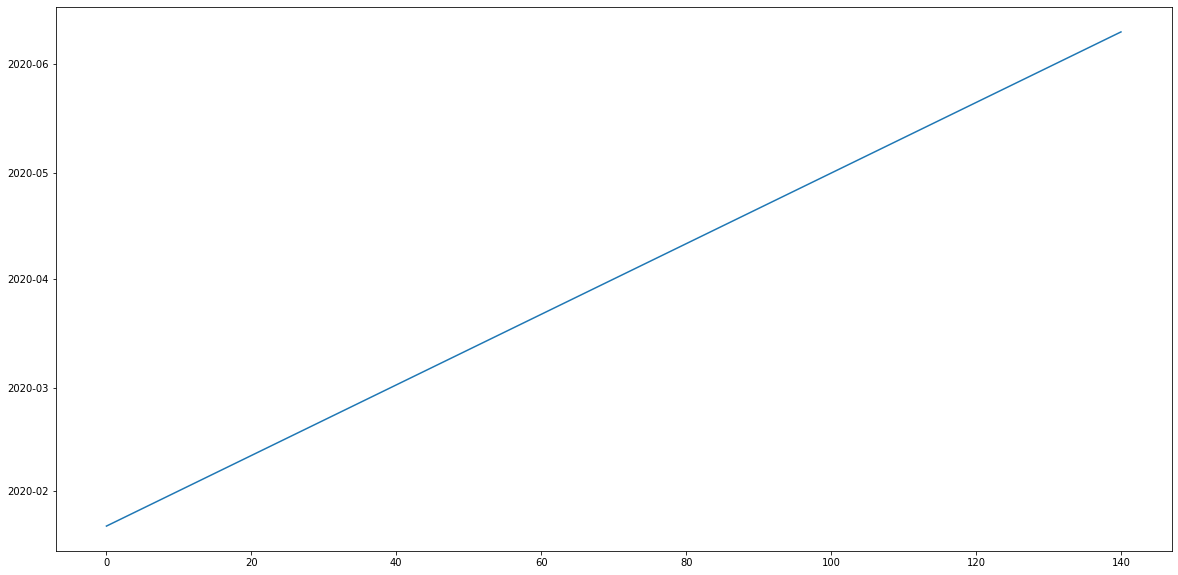

In [147]:
data['cases_date'].plot(figsize=(20,10)) # just for fun plot the graph as time increases

In [0]:
time_series=data2.set_index('cases_date') #set index of the new formated variables

In [156]:
time_series

,Date,Country,Lat,Long,confirmed_per_date,Total_cases_Confirmed,Recovered_per_date,Total_Recovered,Deaths_per_date,Deaths
cases_date,,,,,,,,,,
2020-01-22,1/22/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
2020-01-23,1/23/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
2020-01-24,1/24/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
2020-01-25,1/25/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
2020-01-26,1/26/2020,Ethiopia,9.145,40.489,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-06-06,6/6/2020,Ethiopia,9.145,40.489,129,1934,19,281,1,20
2020-06-07,6/7/2020,Ethiopia,9.145,40.489,86,2020,63,344,7,27
2020-06-08,6/8/2020,Ethiopia,9.145,40.489,136,2156,17,361,0,27


In [157]:
time_series.loc['2020-06']

,Date,Country,Lat,Long,confirmed_per_date,Total_cases_Confirmed,Recovered_per_date,Total_Recovered,Deaths_per_date,Deaths
cases_date,,,,,,,,,,
2020-06-01,6/1/2020,Ethiopia,9.145,40.489,85,1257,8,217,1,12
2020-06-02,6/2/2020,Ethiopia,9.145,40.489,87,1344,14,231,2,14
2020-06-03,6/3/2020,Ethiopia,9.145,40.489,142,1486,15,246,3,17
2020-06-04,6/4/2020,Ethiopia,9.145,40.489,150,1636,4,250,1,18
2020-06-05,6/5/2020,Ethiopia,9.145,40.489,169,1805,12,262,1,19
2020-06-06,6/6/2020,Ethiopia,9.145,40.489,129,1934,19,281,1,20
2020-06-07,6/7/2020,Ethiopia,9.145,40.489,86,2020,63,344,7,27
2020-06-08,6/8/2020,Ethiopia,9.145,40.489,136,2156,17,361,0,27
2020-06-09,6/9/2020,Ethiopia,9.145,40.489,180,2336,18,379,5,32


In [158]:
time_series.columns

Index(['Date', 'Country', 'Lat', 'Long', 'confirmed_per_date',
       'Total_cases_Confirmed', 'Recovered_per_date', 'Total_Recovered',
       'Deaths_per_date', 'Deaths'],
      dtype='object')

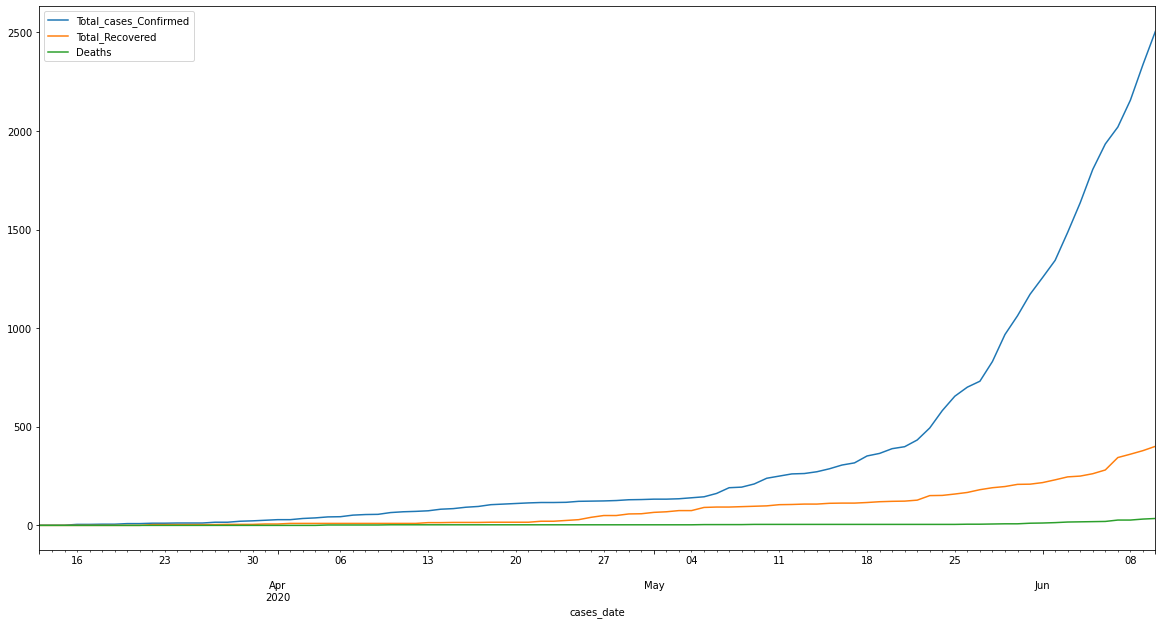

In [159]:
time_series.loc['2020-03-13':'2020-06-10'][[ 'Total_cases_Confirmed',
       'Total_Recovered', 'Deaths']].plot(figsize=(20,10))

In [0]:
'''the folllowing segments used to clone Amharic fonts into google colab in order to plot unicode charcters using matplotlib

For simplicity I just has printed out the english cahrs!
'''

In [0]:
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifEthiopic-hinted.zip'

In [0]:
!unzip "NotoSerifEthiopic-hinted.zip"

In [0]:
!mv NotoSerifEthiopic-Regular.ttf  /usr/share/fonts/truetype/

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fetch the name of font that was installed
path = '/usr/share/fonts/truetype/NotoSerifEthiopic-Regular.ttf'
fontprop = fm.FontProperties(fname=path)


In [0]:
plt.plot(range(50), range(50), 'r')
plt.title('የኮቪድ መረጃ', fontproperties=fontprop)
plt.ylabel('የሞቱ', fontproperties=fontprop)
plt.xlabel('የተያዙ', fontproperties=fontprop)
plt.show()

In [160]:
data_per_day

,Total_cases_Confirmed,Total_Recovered,Deaths
Date,,,
1/22/2020,0,0,0
1/23/2020,0,0,0
1/24/2020,0,0,0
1/25/2020,0,0,0
1/26/2020,0,0,0
...,...,...,...
6/5/2020,1805,262,19
6/6/2020,1934,281,20
6/7/2020,2020,344,27


In [0]:
#the following segment shows day by day ups and downs of confirmed, recovered and death cases
data_by_date=time_series.groupby(['cases_date']).sum().reset_index(drop=None)

# New Section

In [162]:
data_by_date.columns

Index(['cases_date', 'Lat', 'Long', 'confirmed_per_date',
       'Total_cases_Confirmed', 'Recovered_per_date', 'Total_Recovered',
       'Deaths_per_date', 'Deaths'],
      dtype='object')

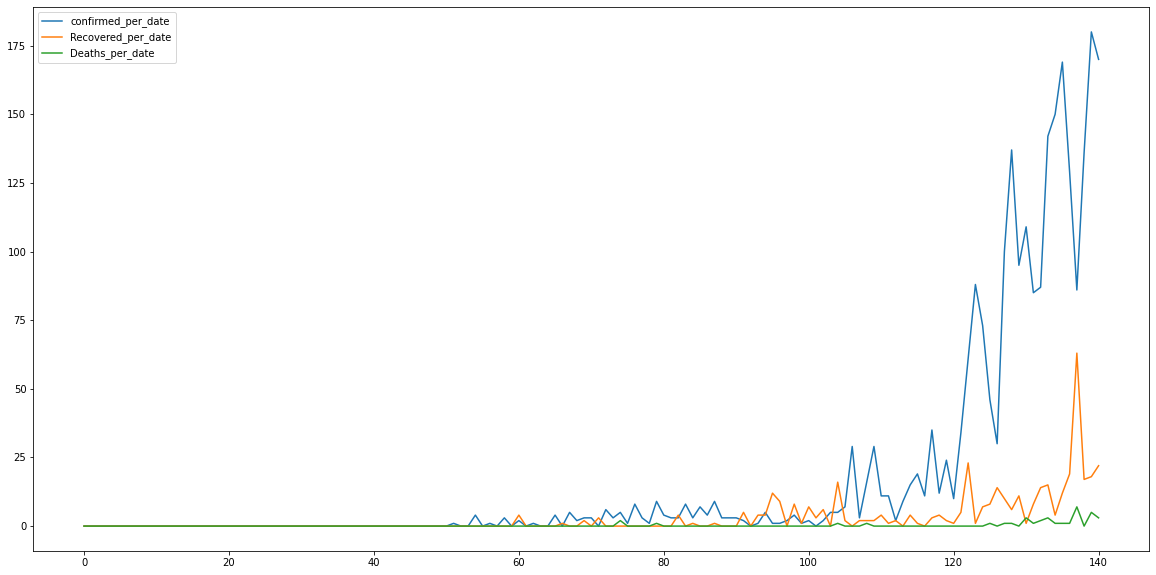

In [165]:
data_by_date[['confirmed_per_date','Recovered_per_date','Deaths_per_date']].plot(kind='line', figsize=(20,10))